In [228]:
import json
import re
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, NullLocator, FixedLocator

In [243]:
def get_number_of_parameters(num_hidden_units):
		"""
		Following Belkin's definition for number of parameters in the network for MNIST (dimension = 784, number of classes = 10),
		get the number of parameters in a model with num_hidden_units number of hidden units.
		params:
			num_hidden_units: (int)
		return (int)
		"""
		return (784 + 1) * num_hidden_units + (num_hidden_units + 1) * 10


def plot_train_and_test_losses(metrics, num_parameters):
		train_losses = []
		test_losses = []
		for model in metrics:
				train_losses.append(metrics[model]["train_loss"][-1])
				test_losses.append(metrics[model]["test_loss"][-1])
				
		num_parameters = [get_number_of_parameters(i) for i in num_parameters]
		fig, ax = plt.subplots(1,1)
		ax.set_xscale('log', base=10)
		ax.tick_params(axis='x', rotation=45, which="minor")
		ax.xaxis.set_minor_locator(FixedLocator([3000, 10000, 40000, 100000, 300000, 400000]))
		ax.xaxis.set_major_locator(NullLocator())
		ax.xaxis.set_minor_formatter(ScalarFormatter())
		ax.set_ylim(0,1)

		ax.plot(num_parameters, train_losses, label="Train loss", color="tab:orange")
		ax.plot(num_parameters, test_losses, marker="o", label="Test loss", color="tab:blue")
		ax.set_xlabel("Number of parameters")
		ax.set_ylabel("Loss")
		ax.set_title("Train and test loss for different number of parameters")
		ax.legend()


def plot_training_progression(model_metrics, num_hidden_units, plot_train=True, plot_test=False):
		fig, ax = plt.subplots(1,1)
		ax.set_ylim(0,1)

		if type(num_hidden_units) is not list:
				num_hidden_units = [num_hidden_units]

		if plot_train:
			train_label = "train: "
			ax.set_title("Train loss throughout training")
		if plot_test:
				test_label = "test: "
				ax.set_title("Test loss throughout training")
		if plot_train and plot_test:
				ax.set_title("Train and test loss throughout model training")

		for num in num_hidden_units:
				num_params = get_number_of_parameters(num)
				model_training_metrics = model_metrics[f"model_{num}"]
				if plot_train:
						ax.plot(model_training_metrics["train_loss"], label=f"{train_label + str(num_params)}")
				if plot_test:
						ax.plot(model_training_metrics["test_loss"], label=f"{test_label + str(num_params)}", linestyle="--")

		ax.set_ylabel("Loss")
		ax.set_xlabel("Epoch")
		ax.legend()

In [245]:
model_metrics = {}
num_hidden_units = []

for folder in ["./models/results_3/2023-06-02/"]:#["./models/results_1/2023-05-31/", "./models/results_1/2023-06-01/"]:
    for path, directories, files in os.walk(folder):
        for file in files:
            if re.search(r".*json", file) is not None:
                with open(f"{path}/{file}", "r") as openfile:
                    num_hidden_unit = re.findall('\d+', file)[0]
                    num_hidden_units.append(int(num_hidden_unit))
                    model_metrics[f"model_{num_hidden_unit}"] = json.load(openfile)

In [246]:
num_hidden_units

[4, 10, 19, 31, 44, 53, 63, 113, 379]

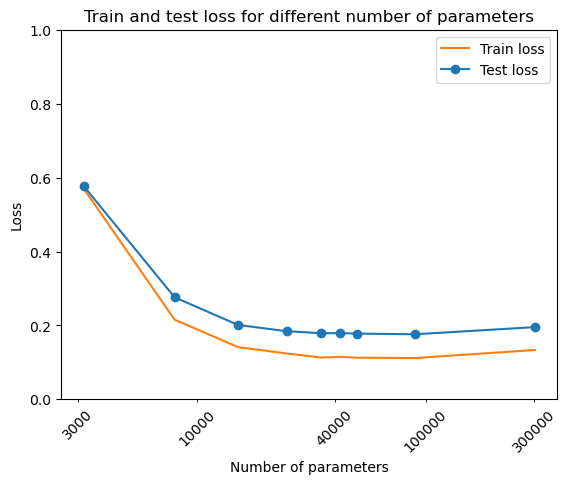

In [247]:
plot_train_and_test_losses(model_metrics, num_hidden_units)

In [249]:
num_hidden_units

[4, 10, 19, 31, 44, 53, 63, 113, 379]

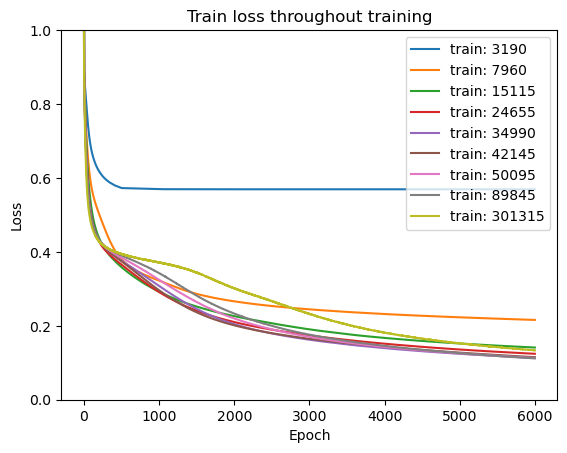

In [252]:
plot_training_progression(model_metrics, [4, 10, 19, 31, 44, 53, 63, 113, 379], plot_train=True, plot_test=False)